In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as mtr
import pickle
import dataframe_image as dfi
from os import listdir
import glob

pd.options.display.max_colwidth = 200

# Fase 1

In [ ]:
metrics = []

for cenario in range(4):

        df = pd.read_csv(f'../Bases/Predictions/rota33642_predictions_cen_{cenario}.csv')
        df["data_partida"] = pd.to_datetime(df["data_partida"])

        RRSE_xgb = np.sqrt(sum((df["tempo_viagem"] - df["predicao_xgb"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_xgb = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_xgb"], squared=False) 
        MAPE_xgb = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_xgb"])

        RRSE_rf = np.sqrt(sum((df["tempo_viagem"] - df["predicao_rf"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_rf = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_rf"], squared=False) 
        MAPE_rf = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_rf"])

        RRSE_svr = np.sqrt(sum((df["tempo_viagem"] - df["predicao_svr"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_svr = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_svr"], squared=False) 
        MAPE_svr = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_svr"])

        RRSE_lr = np.sqrt(sum((df["tempo_viagem"] - df["predicao_lr"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_lr = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_lr"], squared=False) 
        MAPE_lr = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_lr"])


        metrics.append(['RRSE', RRSE_xgb, RRSE_rf, RRSE_svr, RRSE_lr, cenario])
        metrics.append(['RMSE', RMSE_xgb, RMSE_rf, RMSE_svr, RMSE_lr, cenario])
        metrics.append(['MAPE', MAPE_xgb, MAPE_rf, MAPE_svr, MAPE_lr, cenario]) 

In [ ]:
metrics = pd.DataFrame(metrics, columns=['Métrica', 'XGBoosting','Random Forest','Support Vector Regression','Linear Regression', 'Cenário'])

dfi.export(metrics, f"Images/Metrics/metrics_33642.jpg")

In [ ]:
for cenario in range(4):

        df2 = pd.read_csv(f'../Bases/Predictions/rota33642_predictions_cen_{cenario}.csv')
        df2["data_partida"] = pd.to_datetime(df2["data_partida"])
        
        plt.style.use("fivethirtyeight")

        plt.figure(figsize=(15, 5))

        plt.xlabel("Data")
        plt.ylabel("Tempo Viagem")
        plt.title(f"Tempo Viagem Real x Tempo Viagem Predição - Cenário {cenario}")

        df2_plot_predicao = df2[(df2["data_partida"] > "2019-09-15") & (df2["data_partida"] < "2019-09-21")]

        plt.plot(df2_plot_predicao["data_partida"], df2_plot_predicao["tempo_viagem"], color="#1f77b4", label="Real")
        plt.plot(df2_plot_predicao["data_partida"], df2_plot_predicao["predicao_xgb"], color="#ff7f0e", label="XGB")
        plt.plot(df2_plot_predicao["data_partida"], df2_plot_predicao["predicao_svr"], color="#2ca02c", label="SVR")
        plt.plot(df2_plot_predicao["data_partida"], df2_plot_predicao["predicao_rf"], color="#d62728", label="RF")
        plt.plot(df2_plot_predicao["data_partida"], df2_plot_predicao["predicao_lr"], color="#9467bd", label="LR")
        plt.legend()

        plt.savefig(f"Images/Charts/33642_line_chart_cen_{cenario}.jpg")

# Fase 2

In [8]:
lista = glob.glob('../Bases/Predictions/F2/rota33642_predictions_*.csv')

metrics = []

for cenario in range(20):

        df = pd.read_csv(lista[cenario])
        df["data_partida"] = pd.to_datetime(df["data_partida"])

        RRSE_xgb = np.sqrt(sum((df["tempo_viagem"] - df["predicao_xgb"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_xgb = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_xgb"], squared=False) 
        MAPE_xgb = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_xgb"])

        RRSE_rf = np.sqrt(sum((df["tempo_viagem"] - df["predicao_rf"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_rf = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_rf"], squared=False) 
        MAPE_rf = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_rf"])

        RRSE_svr = np.sqrt(sum((df["tempo_viagem"] - df["predicao_svr"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_svr = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_svr"], squared=False) 
        MAPE_svr = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_svr"])

        RRSE_lr = np.sqrt(sum((df["tempo_viagem"] - df["predicao_lr"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_lr = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_lr"], squared=False) 
        MAPE_lr = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_lr"])

        cen = lista[cenario].split('_')[2:6]
        del cen[2]

        label_cen = ", ".join(cen).replace(".csv", "")

        metrics.append(['RRSE', RRSE_xgb, RRSE_rf, RRSE_svr, RRSE_lr, label_cen])
        metrics.append(['RMSE', RMSE_xgb, RMSE_rf, RMSE_svr, RMSE_lr, label_cen])
        metrics.append(['MAPE', MAPE_xgb, MAPE_rf, MAPE_svr, MAPE_lr, label_cen]) 

metrics = pd.DataFrame(metrics, columns=['Métrica', 'XGBoosting','Random Forest','Support Vector Regression','Linear Regression', 'Cenário'])

min_rrse_xgb = metrics.loc[metrics["Métrica"] == "RRSE", "XGBoosting"].min()
min_rrse_rf = metrics.loc[metrics["Métrica"] == "RRSE", "Random Forest"].min()
min_rrse_svr = metrics.loc[metrics["Métrica"] == "RRSE", "Support Vector Regression"].min()
min_rrse_lr = metrics.loc[metrics["Métrica"] == "RRSE", "Linear Regression"].min()

min_rmse_xgb = metrics.loc[metrics["Métrica"] == "RMSE", "XGBoosting"].min()
min_rmse_rf = metrics.loc[metrics["Métrica"] == "RMSE", "Random Forest"].min()
min_rmse_svr = metrics.loc[metrics["Métrica"] == "RMSE", "Support Vector Regression"].min()
min_rmse_lr = metrics.loc[metrics["Métrica"] == "RMSE", "Linear Regression"].min()

min_mape_xgb = metrics.loc[metrics["Métrica"] == "MAPE", "XGBoosting"].min()
min_mape_rf = metrics.loc[metrics["Métrica"] == "MAPE", "Random Forest"].min()
min_mape_svr = metrics.loc[metrics["Métrica"] == "MAPE", "Support Vector Regression"].min()
min_mape_lr = metrics.loc[metrics["Métrica"] == "MAPE", "Linear Regression"].min()

metrics = metrics.groupby(["Cenário", "Métrica"]).mean()

def change_colour(val):
   val["XGBoosting"] = 'background-color: lightgreen' if val["XGBoosting"] == min_rrse_xgb else \
      'background-color: lightblue' if val["XGBoosting"] == min_rmse_xgb else \
      'background-color: orange' if val["XGBoosting"] == min_mape_xgb else '' 
   val["Random Forest"] = 'background-color: lightgreen' if val["Random Forest"] == min_rrse_rf else \
      'background-color: lightblue' if val["Random Forest"] == min_rmse_rf else \
      'background-color: orange' if val["Random Forest"] == min_mape_rf else '' 
   val["Support Vector Regression"] = 'background-color: lightgreen' if val["Support Vector Regression"] == min_rrse_svr else \
      'background-color: lightblue' if val["Support Vector Regression"] == min_rmse_svr else \
      'background-color: orange' if val["Support Vector Regression"] == min_mape_svr else '' 
   val["Linear Regression"] = 'background-color: lightgreen' if val["Linear Regression"] == min_rrse_lr else \
      'background-color: lightblue' if val["Linear Regression"] == min_rmse_lr else \
      'background-color: orange' if val["Linear Regression"] == min_mape_lr else '' 
   
   return val

#metrics = metrics.style.apply(change_colour, axis=1, subset=['XGBoosting', 'Random Forest', 'Support Vector Regression', 'Linear Regression'])

In [87]:
dfi.export(metrics, f"Images/Metrics/metrics_33642_F2.jpg")

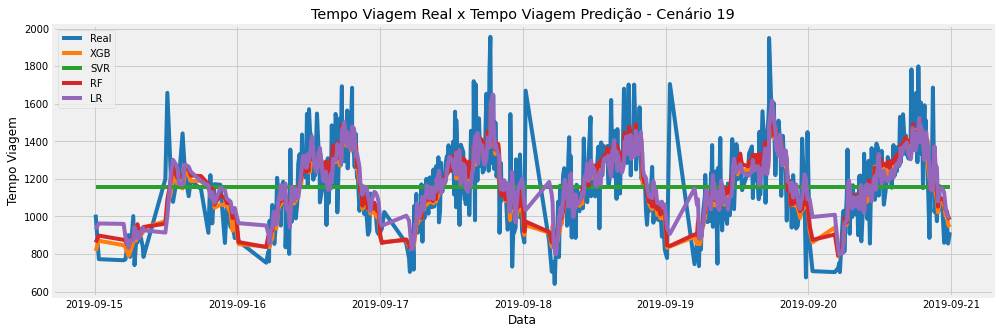

In [88]:
df2 = pd.read_csv(f'../Bases/Predictions/F2/rota33642_predictions_42_51_cen_3.csv')
df2["data_partida"] = pd.to_datetime(df2["data_partida"])

plt.style.use("fivethirtyeight")

plt.figure(figsize=(15, 5))

plt.xlabel("Data")
plt.ylabel("Tempo Viagem")
plt.title(f"Tempo Viagem Real x Tempo Viagem Predição - Cenário {cenario}")

df2_plot_predicao = df2[(df2["data_partida"] > "2019-09-15") & (df2["data_partida"] < "2019-09-21")]

plt.plot(df2_plot_predicao["data_partida"], df2_plot_predicao["tempo_viagem"], color="#1f77b4", label="Real")
plt.plot(df2_plot_predicao["data_partida"], df2_plot_predicao["predicao_xgb"], color="#ff7f0e", label="XGB")
plt.plot(df2_plot_predicao["data_partida"], df2_plot_predicao["predicao_svr"], color="#2ca02c", label="SVR")
plt.plot(df2_plot_predicao["data_partida"], df2_plot_predicao["predicao_rf"], color="#d62728", label="RF")
plt.plot(df2_plot_predicao["data_partida"], df2_plot_predicao["predicao_lr"], color="#9467bd", label="LR")
plt.legend()

plt.savefig(f"Images/Charts/33642_line_chart_42_51_cen_3.jpg")

# Fase 3

## Tempos 3,4,5 e 6

In [15]:
lista = glob.glob('../Bases/Predictions/F3/rota33642_predictions*.csv')

metrics = []

for cenario in range(4):

        df = pd.read_csv(lista[cenario])
        df["data_partida"] = pd.to_datetime(df["data_partida"])

        RRSE_xgb = np.sqrt(sum((df["tempo_viagem"] - df["predicao_xgb"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_xgb = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_xgb"], squared=False) 
        MAPE_xgb = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_xgb"])

        RRSE_rf = np.sqrt(sum((df["tempo_viagem"] - df["predicao_rf"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_rf = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_rf"], squared=False) 
        MAPE_rf = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_rf"])

        RRSE_svr = np.sqrt(sum((df["tempo_viagem"] - df["predicao_svr"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_svr = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_svr"], squared=False) 
        MAPE_svr = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_svr"])

        RRSE_lr = np.sqrt(sum((df["tempo_viagem"] - df["predicao_lr"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_lr = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_lr"], squared=False) 
        MAPE_lr = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_lr"])

        cen = lista[cenario].split('_')[2:6]
        del cen[0]

        label_cen = ", ".join(cen).replace(".csv", "")

        metrics.append(['RRSE', RRSE_xgb, RRSE_rf, RRSE_svr, RRSE_lr, label_cen])
        metrics.append(['RMSE', RMSE_xgb, RMSE_rf, RMSE_svr, RMSE_lr, label_cen])
        metrics.append(['MAPE', MAPE_xgb, MAPE_rf, MAPE_svr, MAPE_lr, label_cen]) 

metrics = pd.DataFrame(metrics, columns=['Métrica', 'XGBoosting','Random Forest','Support Vector Regression','Linear Regression', 'Cenário'])

min_rrse_xgb = metrics.loc[metrics["Métrica"] == "RRSE", "XGBoosting"].min()
min_rrse_rf = metrics.loc[metrics["Métrica"] == "RRSE", "Random Forest"].min()
min_rrse_svr = metrics.loc[metrics["Métrica"] == "RRSE", "Support Vector Regression"].min()
min_rrse_lr = metrics.loc[metrics["Métrica"] == "RRSE", "Linear Regression"].min()

min_rmse_xgb = metrics.loc[metrics["Métrica"] == "RMSE", "XGBoosting"].min()
min_rmse_rf = metrics.loc[metrics["Métrica"] == "RMSE", "Random Forest"].min()
min_rmse_svr = metrics.loc[metrics["Métrica"] == "RMSE", "Support Vector Regression"].min()
min_rmse_lr = metrics.loc[metrics["Métrica"] == "RMSE", "Linear Regression"].min()

min_mape_xgb = metrics.loc[metrics["Métrica"] == "MAPE", "XGBoosting"].min()
min_mape_rf = metrics.loc[metrics["Métrica"] == "MAPE", "Random Forest"].min()
min_mape_svr = metrics.loc[metrics["Métrica"] == "MAPE", "Support Vector Regression"].min()
min_mape_lr = metrics.loc[metrics["Métrica"] == "MAPE", "Linear Regression"].min()

metrics = metrics.groupby(["Cenário", "Métrica"]).mean()

def change_colour(val):
   val["XGBoosting"] = 'background-color: lightgreen' if val["XGBoosting"] == min_rrse_xgb else \
      'background-color: lightblue' if val["XGBoosting"] == min_rmse_xgb else \
      'background-color: orange' if val["XGBoosting"] == min_mape_xgb else '' 
   val["Random Forest"] = 'background-color: lightgreen' if val["Random Forest"] == min_rrse_rf else \
      'background-color: lightblue' if val["Random Forest"] == min_rmse_rf else \
      'background-color: orange' if val["Random Forest"] == min_mape_rf else '' 
   val["Support Vector Regression"] = 'background-color: lightgreen' if val["Support Vector Regression"] == min_rrse_svr else \
      'background-color: lightblue' if val["Support Vector Regression"] == min_rmse_svr else \
      'background-color: orange' if val["Support Vector Regression"] == min_mape_svr else '' 
   val["Linear Regression"] = 'background-color: lightgreen' if val["Linear Regression"] == min_rrse_lr else \
      'background-color: lightblue' if val["Linear Regression"] == min_rmse_lr else \
      'background-color: orange' if val["Linear Regression"] == min_mape_lr else '' 
   
   return val

metrics = metrics.style.apply(change_colour, axis=1, subset=['XGBoosting', 'Random Forest', 'Support Vector Regression', 'Linear Regression'])

dfi.export(metrics, f"Images/Metrics/metrics_33642_F3.jpg")

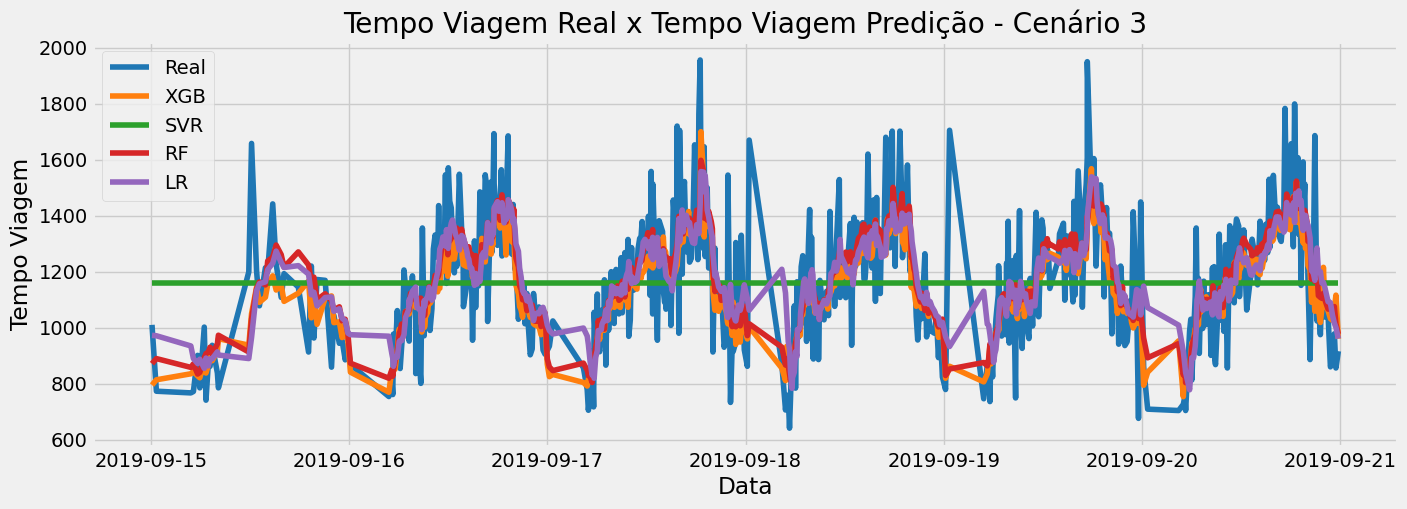

In [16]:
df2 = pd.read_csv(f'../Bases/Predictions/F3/rota33642_predictions_F3_cen_6.csv')
df2["data_partida"] = pd.to_datetime(df2["data_partida"])

plt.style.use("fivethirtyeight")

plt.figure(figsize=(15, 5))

plt.xlabel("Data")
plt.ylabel("Tempo Viagem")
plt.title(f"Tempo Viagem Real x Tempo Viagem Predição - Cenário {cenario}")

df2_plot_predicao = df2[(df2["data_partida"] > "2019-09-15") & (df2["data_partida"] < "2019-09-21")]

plt.plot(df2_plot_predicao["data_partida"], df2_plot_predicao["tempo_viagem"], color="#1f77b4", label="Real")
plt.plot(df2_plot_predicao["data_partida"], df2_plot_predicao["predicao_xgb"], color="#ff7f0e", label="XGB")
plt.plot(df2_plot_predicao["data_partida"], df2_plot_predicao["predicao_svr"], color="#2ca02c", label="SVR")
plt.plot(df2_plot_predicao["data_partida"], df2_plot_predicao["predicao_rf"], color="#d62728", label="RF")
plt.plot(df2_plot_predicao["data_partida"], df2_plot_predicao["predicao_lr"], color="#9467bd", label="LR")
plt.legend()

#plt.savefig(f"Images/Charts/33642_line_chart_42_51_cen_3.jpg")

## Clima e colunas iguais da Tielle

In [3]:
lista = glob.glob('../Bases/Predictions/F3/rota33642_predictions_F3_wea*.csv')

metrics = []

for cenario in range(4):

        df = pd.read_csv(lista[cenario])
        df["data_partida"] = pd.to_datetime(df["data_partida"])

        RRSE_xgb = np.sqrt(sum((df["tempo_viagem"] - df["predicao_xgb"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_xgb = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_xgb"], squared=False) 
        MAPE_xgb = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_xgb"])

        RRSE_rf = np.sqrt(sum((df["tempo_viagem"] - df["predicao_rf"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_rf = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_rf"], squared=False) 
        MAPE_rf = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_rf"])

        RRSE_svr = np.sqrt(sum((df["tempo_viagem"] - df["predicao_svr"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_svr = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_svr"], squared=False) 
        MAPE_svr = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_svr"])

        RRSE_lr = np.sqrt(sum((df["tempo_viagem"] - df["predicao_lr"]) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
        RMSE_lr = mtr.mean_squared_error(df["tempo_viagem"], df["predicao_lr"], squared=False) 
        MAPE_lr = mtr.mean_absolute_percentage_error(df["tempo_viagem"], df["predicao_lr"])

        cen = lista[cenario].split('_')[2:6]
        del cen[0]

        label_cen = ", ".join(cen).replace(".csv", "")

        metrics.append(['RRSE', RRSE_xgb, RRSE_rf, RRSE_svr, RRSE_lr, label_cen])
        metrics.append(['RMSE', RMSE_xgb, RMSE_rf, RMSE_svr, RMSE_lr, label_cen])
        metrics.append(['MAPE', MAPE_xgb, MAPE_rf, MAPE_svr, MAPE_lr, label_cen]) 

metrics = pd.DataFrame(metrics, columns=['Métrica', 'XGBoosting','Random Forest','Support Vector Regression','Linear Regression', 'Cenário'])

min_rrse_xgb = metrics.loc[metrics["Métrica"] == "RRSE", "XGBoosting"].min()
min_rrse_rf = metrics.loc[metrics["Métrica"] == "RRSE", "Random Forest"].min()
min_rrse_svr = metrics.loc[metrics["Métrica"] == "RRSE", "Support Vector Regression"].min()
min_rrse_lr = metrics.loc[metrics["Métrica"] == "RRSE", "Linear Regression"].min()

min_rmse_xgb = metrics.loc[metrics["Métrica"] == "RMSE", "XGBoosting"].min()
min_rmse_rf = metrics.loc[metrics["Métrica"] == "RMSE", "Random Forest"].min()
min_rmse_svr = metrics.loc[metrics["Métrica"] == "RMSE", "Support Vector Regression"].min()
min_rmse_lr = metrics.loc[metrics["Métrica"] == "RMSE", "Linear Regression"].min()

min_mape_xgb = metrics.loc[metrics["Métrica"] == "MAPE", "XGBoosting"].min()
min_mape_rf = metrics.loc[metrics["Métrica"] == "MAPE", "Random Forest"].min()
min_mape_svr = metrics.loc[metrics["Métrica"] == "MAPE", "Support Vector Regression"].min()
min_mape_lr = metrics.loc[metrics["Métrica"] == "MAPE", "Linear Regression"].min()

metrics = metrics.groupby(["Cenário", "Métrica"]).mean()

def change_colour(val):
   val["XGBoosting"] = 'background-color: lightgreen' if val["XGBoosting"] == min_rrse_xgb else \
      'background-color: lightblue' if val["XGBoosting"] == min_rmse_xgb else \
      'background-color: orange' if val["XGBoosting"] == min_mape_xgb else '' 
   val["Random Forest"] = 'background-color: lightgreen' if val["Random Forest"] == min_rrse_rf else \
      'background-color: lightblue' if val["Random Forest"] == min_rmse_rf else \
      'background-color: orange' if val["Random Forest"] == min_mape_rf else '' 
   val["Support Vector Regression"] = 'background-color: lightgreen' if val["Support Vector Regression"] == min_rrse_svr else \
      'background-color: lightblue' if val["Support Vector Regression"] == min_rmse_svr else \
      'background-color: orange' if val["Support Vector Regression"] == min_mape_svr else '' 
   val["Linear Regression"] = 'background-color: lightgreen' if val["Linear Regression"] == min_rrse_lr else \
      'background-color: lightblue' if val["Linear Regression"] == min_rmse_lr else \
      'background-color: orange' if val["Linear Regression"] == min_mape_lr else '' 
   
   return val

metrics = metrics.style.apply(change_colour, axis=1, subset=['XGBoosting', 'Random Forest', 'Support Vector Regression', 'Linear Regression'])

dfi.export(metrics, f"Images/Metrics/metrics_33642_F3_weather.jpg")